In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
train_data = pd.read_csv('.\\datasets\\train_tweets.csv')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [24]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [25]:
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Cleaning the data

In [27]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [28]:
def process_tweet():
    train_data['processed_tweets'] = train_data['tweet'].str.replace('[^A-Za-z0-9 ]', '')
    train_data['processed_tweets'] = train_data['processed_tweets'].str.replace('@[a-zA-Z0-9]+', '')

In [29]:
import re
## example ## 
print("Text before filtering:\nouch...he is angry..., @user")
print("\n\nText after filtering:")
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "","ouch...he is angry..., @user")

Text before filtering:
ouch...he is angry..., @user


Text after filtering:


'ouchhe is angry '

In [30]:
#train_data['processed_tweets'] = train_data['tweet'].apply(process_tweet)
process_tweet()

train_data.head()

<ipython-input-28-2c40df61459d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['processed_tweets'] = train_data['tweet'].str.replace('[^A-Za-z0-9 ]', '')
<ipython-input-28-2c40df61459d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['processed_tweets'] = train_data['processed_tweets'].str.replace('@[a-zA-Z0-9]+', '')


,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [31]:
drop_features(['id','tweet'],train_data)

In [32]:
train_data.head()

,label,processed_tweets
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label             31962 non-null  int64 
 1   processed_tweets  31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [34]:
train_data['processed_tweets'] = train_data['processed_tweets'].apply(lambda x: x.split())
train_data.head(10)

,label,processed_tweets
0,0,"[user, when, a, father, is, dysfunctional, and..."
1,0,"[user, user, thanks, for, lyft, credit, i, can..."
2,0,"[bihday, your, majesty]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguide, society, now, motivation]"
5,0,"[22, huge, fan, fare, and, big, talking, befor..."
6,0,"[user, camping, tomorrow, user, user, user, us..."
7,0,"[the, next, school, year, is, the, year, for, ..."
8,0,"[we, won, love, the, land, allin, cavs, champi..."
9,0,"[user, user, welcome, here, im, its, so, gr8]"


In [35]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
train_data['processed_tweets']= train_data['processed_tweets'].apply(lambda x: [stemmer.stem(i) for i in x])
train_data.head(10)

,label,processed_tweets
0,0,"[user, when, a, father, is, dysfunct, and, is,..."
1,0,"[user, user, thank, for, lyft, credit, i, cant..."
2,0,"[bihday, your, majesti]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguid, societi, now, motiv]"
5,0,"[22, huge, fan, fare, and, big, talk, befor, t..."
6,0,"[user, camp, tomorrow, user, user, user, user,..."
7,0,"[the, next, school, year, is, the, year, for, ..."
8,0,"[we, won, love, the, land, allin, cav, champio..."
9,0,"[user, user, welcom, here, im, it, so, gr8]"


In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
import string

def process(text):
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    nopunc = " ".join(nopunc)
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

train_data['processed_tweets'] = train_data['processed_tweets'].apply(process)
train_data.head(10)

,label,processed_tweets
0,0,"[drag, kid, run, user, selfish, father, dysfunct]"
1,0,"[thank, getthank, offer, user, cant, wheelchai..."
2,0,"[bihday, majesti]"
3,0,"[ur, time, love, model, u, take]"
4,0,"[factsguid, motiv, societi]"
5,0,"[fare, talk, huge, chao, fan, befor, big, alls..."
6,0,"[camp, user, tomorrow, danni]"
7,0,"[think, hate, school, revolutionschool, cant, ..."
8,0,"[champion, land, clevelandcavali, love, clevel..."
9,0,"[user, im, welcom, gr8]"


In [37]:
def join_tokens(tweet):
    return " ".join(tweet)

train_data['processed_tweets'] = train_data['processed_tweets'].apply(join_tokens)

In [38]:
train_data.head(10)

,label,processed_tweets
0,0,drag kid run user selfish father dysfunct
1,0,thank getthank offer user cant wheelchair disa...
2,0,bihday majesti
3,0,ur time love model u take
4,0,factsguid motiv societi
5,0,fare talk huge chao fan befor big allshowandno...
6,0,camp user tomorrow danni
7,0,think hate school revolutionschool cant actors...
8,0,champion land clevelandcavali love cleveland a...
9,0,user im welcom gr8


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data["processed_tweets"],train_data["label"], test_size = 0.2, random_state = 42)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 30232)
(25569, 30232)


In [41]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 30232)
(6393, 30232)


# K nearest neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [43]:
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 10): 
    model2 = KNeighborsClassifier(n_neighbors = k) 
    model2.fit(x_train_tfidf,y_train) 
  
    #training_score = clf.score(x_train_tfidf,y_train) 
    predKNN = model2.predict(x_test_tfidf)
    test_score = model2.score(x_test_tfidf, y_test) 
    K.append(k) 
  
    #training.append(training_score) 
    test.append(test_score)

In [44]:
c_m2 = confusion_matrix(y_test,predKNN)
print(c_m2)

print("\n\nAccuracy:")
print(test)

[[5937    0]
 [ 401   55]]


Accuracy:
[0.9411856718285625, 0.9410292507430001, 0.9397778820585014, 0.9397778820585014, 0.9382136712028781, 0.9385265133740028, 0.9372751446895041, 0.9372751446895041]


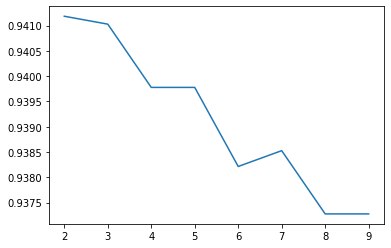

In [45]:
plt.plot(range(2,10),test)

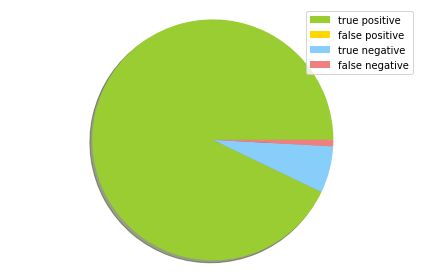

In [46]:
labels = 'true positive','false positive','true negative','false negative'
a,b,c,d=c_m2[0][0],c_m2[0][1],c_m2[1][0],c_m2[1][1]
sizes = [a,b,c,d]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

plt.show()

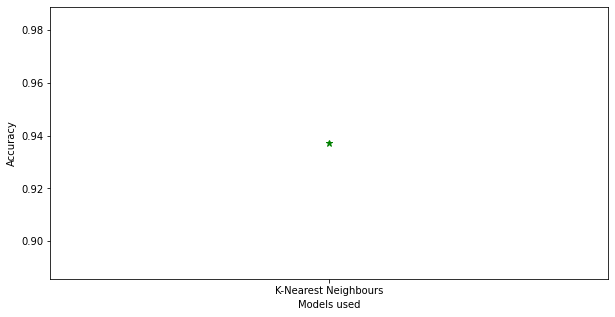

In [47]:
mod_accuracy=[accuracy_score(y_test,predKNN)]
models=["K-Nearest Neighbours"]

plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'g*',linestyle='dashed',linewidth=1, markersize=7)
plt.xlabel("Models used")
plt.ylabel("Accuracy")
plt.show()